In [1]:
import pandas as pd
import geopandas as gpd

# Define file paths (update these paths based on your local directory)
file_paths = {
    "listings": "data/listings.csv.gz",
    "calendar": "data/calendar.csv.gz",
    "reviews": "data/reviews.csv.gz",
    "listings_summary": "data/listings.csv",
    "reviews_summary": "data/reviews.csv",
    "neighbourhoods": "data/neighbourhoods.csv",
    "neighbourhoods_geojson": "data/neighbourhoods.geojson"
}

# Load files into individual dataframes
listings = pd.read_csv(file_paths["listings"], low_memory=False)
calendar = pd.read_csv(file_paths["calendar"], low_memory=False)
reviews = pd.read_csv(file_paths["reviews"], low_memory=False)
listings_summary = pd.read_csv(file_paths["listings_summary"], low_memory=False)
reviews_summary = pd.read_csv(file_paths["reviews_summary"], low_memory=False)
neighbourhoods = pd.read_csv(file_paths["neighbourhoods"], low_memory=False)
neighbourhoods_geojson = gpd.read_file(file_paths["neighbourhoods_geojson"])

# Display summary and head of each dataframe
dataframes = {
    "listings": listings,
    "calendar": calendar,
    "reviews": reviews,
    "listings_summary": listings_summary,
    "reviews_summary": reviews_summary,
    "neighbourhoods": neighbourhoods,
    "neighbourhoods_geojson": neighbourhoods_geojson
}

for df_name, df in dataframes.items():
    print(f"DataFrame name: {df_name}")
    print(f"Summary of {df_name}:")
    print(df.info())
    print(f"\nFirst 5 rows of {df_name}:")
    print(df.head())
    print("\n")


DataFrame name: listings
Summary of listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18230 entries, 0 to 18229
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18230 non-null  int64  
 1   listing_url                                   18230 non-null  object 
 2   scrape_id                                     18230 non-null  int64  
 3   last_scraped                                  18230 non-null  object 
 4   source                                        18230 non-null  object 
 5   name                                          18230 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         11081 non-null  object 
 8   picture_url                                   18230 non-null  object 
 9   host_id        

# Questions from Professor

The data is for one day, avaliable at one time. With that, there is not a ton of data. One ask is to clean the data for processing
- cluter the listings: categories of listings. There are a lot of features. Show the results, and compare models.
- do the same for the hosts. Number of properties the house has. 
- You can apply certain rules. 

- Each listing comes with a price. Most of the time these prices are constant. Find out the top 3 factors for price. 

4. This does not have a definite answer. Let us say you live in a 3 bedroom 2 bathroom house. We can use that as an estimate of the size of the proeprty. And you have the flexibility to put it anywhere in this map. Where do you want to be? 

BONUS: what else can you do if you are the investor to increase expected revenue? 

QUESTIONS: 
- how many reports? There are different rules

- Connect extrsa data like house prices. 

- There is a particular goal. If you can create a good connection, that would be good. 

- For question 4) do we seperate the value per bedroom. 70% was whole house, 20% private bedroom. 
 IT is just up to us, we can choose what works best to get most revenue.

- So we assume we have a single family home. Maximize the daily value per bedroom. The reason why is that it is normalized. If you divide that by 10, maybe the 1 bedroom condo would give better revenue. This is just a way to normalize revenue. 

## How is it going to be graded?

This is complicated, it is suggested as a group. The grading is based on the group and individual performance. group of 4 people, everyone submits their own report. 

Divide the project into a few parts. In practice, it will all be a team effort. 

If you have two team members, 2 and 3. and another do 4 and 5. 

Is there specific format for project report, same as the midterm. 
Jupyter Notebook. Presentations. 

Submit your own individual report. Ideally, it will only need to cover your part. 

For the presentaiton for the slides, you can have a whole presentation. Do it as a group. How many slides should be per group member. 

- A nice thing to do is to have each model member do different models. 

- Minutes to present (TBD). 

- When you upload files with submissions: make sure you have first and last name. 

In [2]:
# Adjust display settings to show all columns
pd.set_option('display.max_columns', None)
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,57818,https://www.airbnb.com/rooms/57818,20231225202534,2023-12-26,city scrape,Home in Hollywood · ★4.63 · 2 bedrooms · 2 bed...,NaN,Check-in window<br />After 3:00 PM<br />Edit<b...,https://a0.muscache.com/pictures/miso/Hosting-...,275948,https://www.airbnb.com/users/show/275948,Von Inc,2010-11-01,"Hollywood, FL","I love my house...the neighbors are wonderful,...",within an hour,100%,96%,t,https://a0.muscache.com/im/pictures/user/1f267...,https://a0.muscache.com/im/pictures/user/1f267...,NaN,3.0,3.0,"['email', 'phone']",t,t,"Hollywood, Florida, United States",Hollywood,NaN,26.01859,-80.12430,Entire home,Entire home/apt,4,NaN,1 bath,NaN,2.0,[],$190.00,32,1125,1,32,1125,1125,31.9,1125.0,NaN,t,2,2,10,214,2023-12-26,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,NaN,f,2,2,0,0,0.43
1,69824,https://www.airbnb.com/rooms/69824,20231225202534,2023-12-26,city scrape,Rental unit in Hallandale · ★4.0 · 2 bedrooms ...,NaN,NaN,https://a0.muscache.com/pictures/443102/f6b94e...,351303,https://www.airbnb.com/users/show/351303,Tracy,2011-01-17,"Silver Spring, MD",NaN,within an hour,100%,50%,f,https://a0.muscache.com/im/users/351303/profil...,https://a0.muscache.com/im/users/351303/profil...,NaN,3.0,5.0,"['email', 'phone']",t,t,NaN,Hallandale Beach,NaN,25.97641,-80.12052,Entire rental unit,Entire home/apt,6,NaN,2 baths,NaN,4.0,[],$140.00,30,365,30,30,365,365,30.0,365.0,NaN,t,19,19,19,281,2023-12-26,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,NaN,f,2,2,0,0,0.12
2,83449,https://www.airbnb.com/rooms/83449,20231225202534,2023-12-27,city scrape,Rental unit in Dania Beach · ★4.77 · 2 bedroom...,NaN,"Residential neighborhood, less than 2 miles to...",https://a0.muscache.com/pictures/8c21bda0-5194...,454736,https://www.airbnb.com/users/show/454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL","LOCATION,LOCATION,LOCATION, NUMBER 1 ACCOMMOD...",within an hour,100%,97%,f,https://a0.muscache.com/im/users/454736/profil...,https://a0.muscache.com/im/users/454736/profil...,NaN,17.0,20.0,"['email', 'phone']",t,t,"Dania Beach, Florida, United States",Dania Beach,NaN,26.03392,-80.14201,Entire rental unit,Entire home/apt,5,NaN,1 bath,NaN,3.0,[],$127.00,7,180,7,7,180,180,7.0,180.0,NaN,t,0,1,1,1,2023-12-27,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,NaN,f,15,15,0,0,0.21
3,105411,https://www.airbnb.com/rooms/105411,20231225202534,2023-12-26,city scrape,Rental unit in Southwest Ranches · ★5.0 · 3 be...,NaN,"Very close to I75, one of the main highways. Y...",https://a0.muscache.com/pictures/787317/2cc18e...,532930,https://www.airbnb.com/users/show/532930,Sonia,2011-04-25,"Southwest Ranches, FL",We are 

We are going to remove obviously unnessessary columns:

In [16]:
# Remove unnecessary columns
columns_to_remove = [
    "listing_url", "scrape_id", "last_scraped", "source", "description",
    "neighborhood_overview", "picture_url", "host_url", "host_about",
    "host_thumbnail_url", "host_picture_url", "host_neighbourhood",
    "neighbourhood", "neighbourhood_group_cleansed", "bathrooms", 
    "bedrooms", "amenities", "calendar_updated", "calendar_last_scraped",
    "license", "instant_bookable", "host_verifications", "property_type", "name", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights",
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes"
]

listings_cleaned = listings.drop(columns=columns_to_remove)

# Clean the price column by removing dollar signs and converting to numeric
listings_cleaned['price'] = listings_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# Extract numeric values from bathrooms_text and create a new bathrooms column
listings_cleaned['bathrooms'] = listings_cleaned['bathrooms_text'].str.extract('(\d+(\.\d+)?)')[0].astype(float)

# Drop the old bathrooms_text column
listings_cleaned.drop(columns=['bathrooms_text'], inplace=True)

# Display the first 5 rows of the cleaned dataframe
listings_cleaned.head(10)

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms
0,57818,275948,Von Inc,2010-11-01,"Hollywood, FL",within an hour,100%,96%,t,3.0,3.0,t,t,Hollywood,26.01859,-80.12430,Entire home/apt,4,2.0,190.0,32,1125,t,2,2,10,214,58,1,0,2013-01-03,2023-03-31,4.63,4.69,4.61,5.00,4.97,4.88,4.71,0,0,0.43,1.0
1,69824,351303,Tracy,2011-01-17,"Silver Spring, MD",within an hour,100%,50%,f,3.0,5.0,t,t,Hallandale Beach,25.97641,-80.12052,Entire home/apt,6,4.0,140.0,30,365,t,19,19,19,281,4,2,0,2021-03-27,2023-06-03,4.00,4.50,4.00,4.75,4.75,5.00,4.50,0,0,0.12,2.0
2,83449,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,5,3.0,127.0,7,180,t,0,1,1,1,31,9,1,2011-11-01,2023-12-17,4.77,4.87,4.84,4.94,4.90,4.81,4.87,0,0,0.21,1.0
3,105411,532930,Sonia,2011-04-25,"Southwest Ranches, FL",within an hour,80%,57%,f,3.0,3.0,t,t,Southwest Ranches,26.04750,-80.36668,Entire home/apt,5,3.0,235.0,4,180,t,24,54,84,359,4,0,0,2012-08-06,2018-03-28,5.00,5.00,5.00,5.00,5.00,4.25,5.00,0,0,0.03,2.0
4,129099,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.99414,-80.11814,Entire home/apt,5,2.0,324.0,20,365,t,6,18,29,304,27,0,0,2011-08-23,2022-07-01,4.29,4.42,4.24,4.44,4.32,4.54,4.08,0,0,0.18,1.5
5,191160,924482,Dan,2011-08-05,"Fort Lauderdale, FL",NaN,NaN,NaN,f,2.0,3.0,t,f,Deerfield Beach,26.30707,-80.07793,Entire home/apt,4,2.0,119.0,2,180,t,1,1,1,86,25,0,0,2012-01-04,2019-11-08,4.25,4.39,4.46,4.83,4.87,4.87,4.43,0,0,0.17,1.0
6,216046,964836,Gary,2011-08-13,"Hollywood, FL",within an hour,100%,93%,t,1.0,2.0,t,t,Hollywood,26.00770,-80.19722,Entire home/apt,10,7.0,295.0,3,21,t,11,18,29,279,106,11,0,2012-01-02,2023-11-21,4.81,4.79,4.81,4.92,4.77,4.77,4.77,0,0,0.73,3.0
7,217990,637272,Bianca,2011-05-28,"Buenos Aires, Argentina",a few days or more,36%,18%,f,9.0,19.0,t,t,Hollywood,25.99398,-80.11677,Entire home/apt,5,1.0,250.0,10,365,t,19,49,79,354,18,0,0,2011-11-21,2018-03-19,4.93,4.88,4.81,5.00,5.00,4.88,4.81,0,0,0.12,1.5
8,241944,454736,"Jon, Mary Pop Apartments",2011-03-21,"Dania Beach, FL",within an hour,100%,97%,f,17.0,20.0,t,t,Dania Beach,26.03392,-80.14201,Entire home/apt,3,2.0,89.0,7,175,t,17,17,17,17,13,3,1,2012-07-28,2023-12-02,4.58,4.54,4.54,4.85,4.92,4.54,4.54,0,0,0.09,1.0
9,256386,1304156,Nicolas,2011-10-17,"Sunny Isles Beach, FL",within an hour,100%,99%,t,7.0,10.0,t,t,Hollywood,26.02584,-80.14191,Entire home/apt,4,2.0,120.0,2,365,t,17,35,54,327,247,27,4,2012-01-02,2023-12-18,4.84,4.88,4.87,4.93,4.91,4.67,4.79,0,0,1.69,1.0


In [13]:
# Calculate the correlation matrix for only numeric columns
correlation_matrix = listings_cleaned.select_dtypes(include='number').corr()

# Display the correlation matrix for price with other numerical columns
print(correlation_matrix['price'])


id                                              0.001230
host_id                                        -0.000203
host_listings_count                            -0.003733
host_total_listings_count                      -0.002942
latitude                                       -0.016896
longitude                                       0.042550
accommodates                                    0.242030
beds                                            0.219146
price                                           1.000000
minimum_nights                                 -0.015488
maximum_nights                                  0.035181
minimum_minimum_nights                         -0.015457
maximum_minimum_nights                         -0.013722
minimum_maximum_nights                          0.002212
maximum_maximum_nights                          0.002582
minimum_nights_avg_ntm                         -0.015974
maximum_nights_avg_ntm                          0.002582
availability_30                

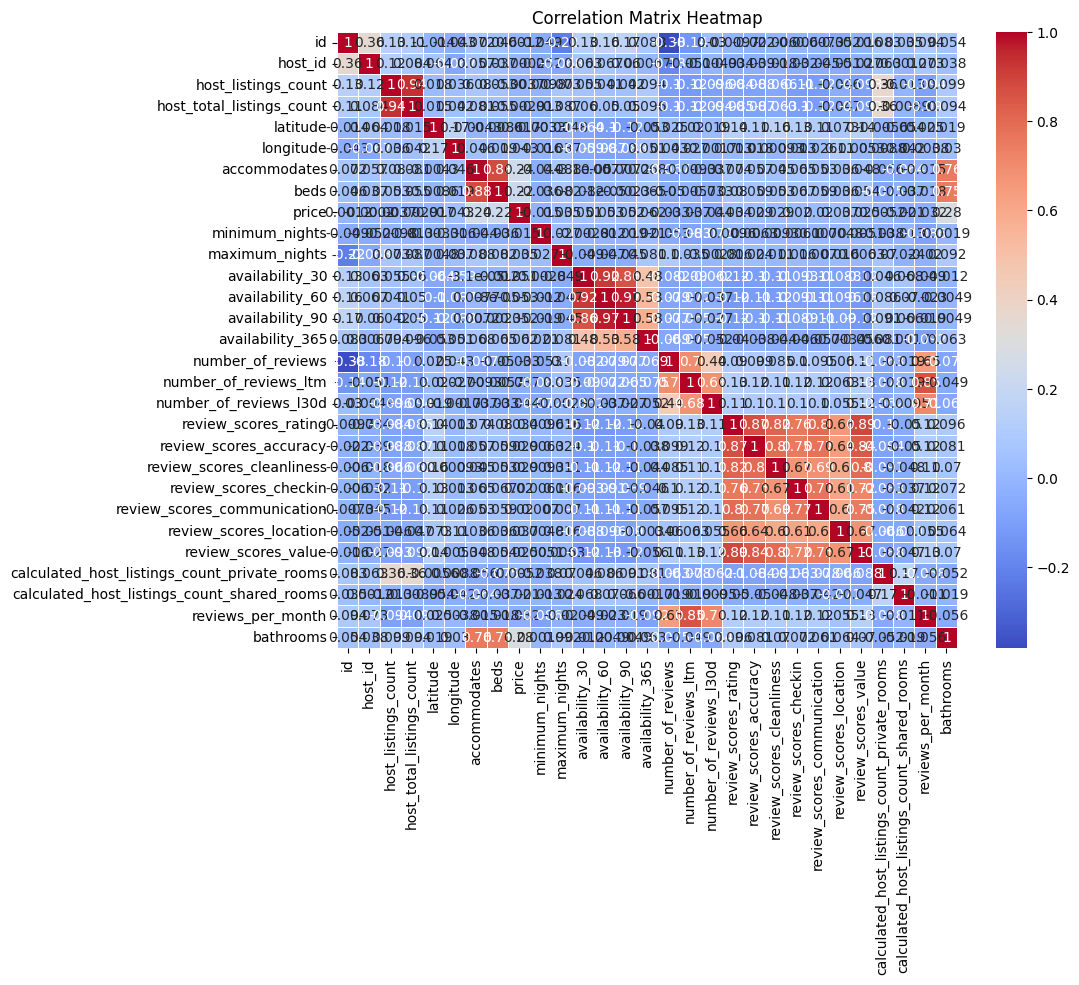

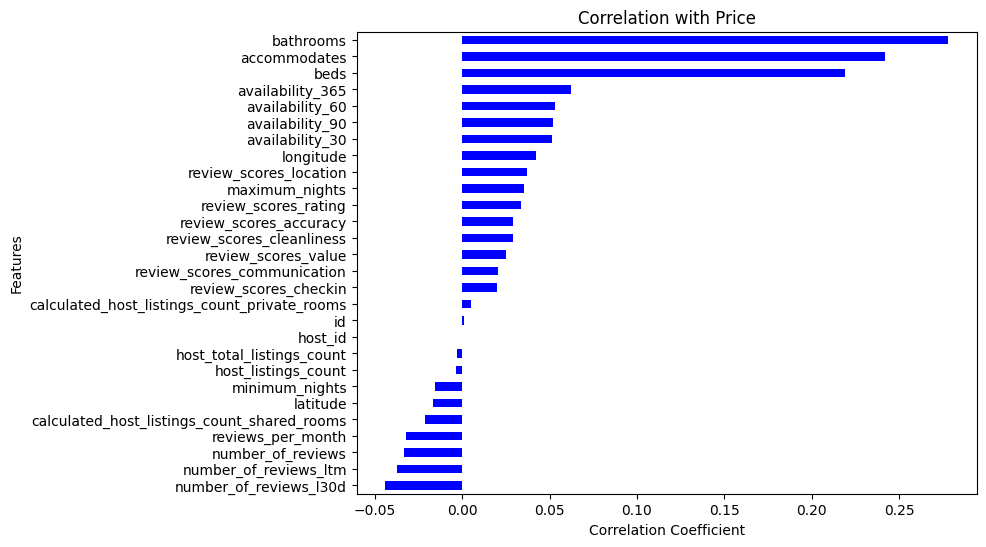

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for only numeric columns
correlation_matrix = listings_cleaned.select_dtypes(include='number').corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Display the correlation matrix for price with other numerical columns as a bar plot
plt.figure(figsize=(8, 6))
correlation_matrix['price'].drop('price').sort_values().plot(kind='barh', color='blue')
plt.title('Correlation with Price')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [5]:
# Display unique values of property_type and room_type
unique_property_types = listings_cleaned['property_type'].unique()
unique_room_types = listings_cleaned['room_type'].unique()

print("Unique property types:")
print(unique_property_types)
print("\nUnique room types:")
print(unique_room_types)


Unique property types:
['Entire home' 'Entire rental unit' 'Entire condo'
 'Private room in guest suite' 'Private room in guesthouse'
 'Private room in condo' 'Entire townhouse' 'Entire guest suite'
 'Private room in rental unit' 'Private room in home'
 'Private room in bed and breakfast' 'Entire villa'
 'Private room in townhouse' 'Entire cottage' 'Entire serviced apartment'
 'Entire cabin' 'Room in boutique hotel' 'Private room in resort'
 'Room in bed and breakfast' 'Private room in villa' 'Entire bungalow'
 'Entire guesthouse' 'Entire chalet' 'Private room' 'Entire place'
 'Room in aparthotel' 'Room in hotel' 'Private room in bungalow'
 'Camper/RV' 'Barn' 'Room in serviced apartment' 'Room in resort' 'Boat'
 'Casa particular' 'Private room in tiny home' 'Private room in farm stay'
 'Private room in loft' 'Entire loft' 'Entire vacation home'
 'Entire resort' 'Private room in casa particular' 'Tiny home'
 'Private room in tent' 'Shared room in home' 'Entire timeshare'
 'Shared room i

In [6]:
# Display unique values of the specified columns
unique_calculated_host_listings_count = listings_cleaned['calculated_host_listings_count'].unique()
unique_calculated_host_listings_count_entire_homes = listings_cleaned['calculated_host_listings_count_entire_homes'].unique()
unique_calculated_host_listings_count_private_rooms = listings_cleaned['calculated_host_listings_count_private_rooms'].unique()
unique_calculated_host_listings_count_shared_rooms = listings_cleaned['calculated_host_listings_count_shared_rooms'].unique()

print("Unique values for calculated_host_listings_count:")
print(unique_calculated_host_listings_count)
print("\nUnique values for calculated_host_listings_count_entire_homes:")
print(unique_calculated_host_listings_count_entire_homes)
print("\nUnique values for calculated_host_listings_count_private_rooms:")
print(unique_calculated_host_listings_count_private_rooms)
print("\nUnique values for calculated_host_listings_count_shared_rooms:")
print(unique_calculated_host_listings_count_shared_rooms)


Unique values for calculated_host_listings_count:
[  2  15   1   5   4  23  12   3  10   7   6  30  21  14   8   9  36  77
  50  16  11  13 177  20  31  39  18 137  27  32  56  40 106  25  42  44
  60  22  28 110  29  43  59  41  75  19  17  35  45  55  63 356  51  46
  34  26  38  24  84 118  62  73]

Unique values for calculated_host_listings_count_entire_homes:
[  2  15   1   5   4   0  23   3  10   7  30  21  11   8   9  36   6  77
  50  16  13 177  20  12  31  39 112  14  18  27  32  56  40 106  25  42
  44  60  22  28 109  17  59  41  75  19  35  45  43  55  63 353  51  46
  34  29  33 105  24  84  26 118]

Unique values for calculated_host_listings_count_private_rooms:
[ 0  2  1 12  3  4  5  6  8 25  7  9 11 23 21 16 10 15 22 35 56 42 14]

Unique values for calculated_host_listings_count_shared_rooms:
[ 0  1 11  2  6  5  4  3]
